Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time indexed data.

- **Time stamps** reference particular moments in time (e.g., July 4th, 2015, at 7:00 a.,.).
- **Time Intervals** and **periods** reference a length of time btw a particular beginning and end point
<br> for example, the year 2015
<br> Periods usually referencec a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods constituting days).
- **Time deltas** or **durations** reference an exact length of time (e.g., a duration of 22.56 sec)

In this section, we will introduce how to work with each of these types of date/time data in Pandas.

## Dates and Times in Python

### 1. Native Python dates and times : datetime and dateutil
Python's basic objects for working with dates and times reside in the built-in `datetime` module.
<br> Along with the third-party `dateutil` module, you can use it to quickly perform a host of useful functions.

In [27]:
# manually build a date using the datetime type
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [28]:
# Or, using the dateutil module, you can parse dates from a variety of string formats
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [29]:
# Once you have a datetime object, you can do things like printing the day of the week
date.strftime('%A')

'Saturday'

You can read more about in the 'strftime section' of Python's datetime documentation.

### 2. Types arrays of times : NumPy's datetime64
The `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [30]:
# datetime64 requires a very specific input format
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [31]:
# Once we have this date formatted, we can quickly do vectorized operations on it
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

One detail of the `datetime64` and `timedelta64` objects is that they are built on a *fundamental time unit.*
<br>Because the `datetime64` object is limited to 64-bit precision, the range of encodable times is 2^64 times this fundamental unit.
<br> In other words, `datetime64` imposes a trade-off btw `time resolution` and `maximum time span`.

In [32]:
# For example,
# If you want a time resolution of one nanosecond,
# you only have enough information to encode a range of 2^64 nanoseconds.
# here is a day-based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [33]:
# here is a minute-based datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [34]:
# nanosecond based time
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

Though datetime64 data type addresses some of the deficiencies of the built-in Python `datetime` type, 
<br>it lacks many of the convenient methods and functions provided by `datetime` and especially `dateutil`.

### 3. Dates and times in Pandas : Best of both worlds
Pandas provide a `Timestamp` object, which combines the ease of use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`.
<br>From a group of these `Timestamp` objects, Pandas can construct a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`.

In [35]:
# What we've done above
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [36]:
date.strftime("%A")

'Saturday'

In [37]:
# NumPy-style vectorized operations
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series

### 1. Pandas Time Series : Indexing by Time
Where the Pandas time series tools really become useful is when you begin to **index data by timestamps**.
<br> For example, we can construct a `Series` object that has time-indexed data :

In [38]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [39]:
# We can make use of any of the `Series` indexing patterns
data['2014-07-04' : '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [40]:
# special date-only indexing operations
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### 2. Pandas Time Series : Data Structures
- `Time Stamps` : Pandas provides the `Timestamp` type. It is essentially a replacement for Python's native `datetime`, but is based on the more efficient `numpy.datetime64` data type.
<br>The associated index structure is `DatetimeIndex`. 
- `Time Periods` : Pandas provides the `Period` type. This encodes a fixed-frequency interval based on `numpy.datetime64`. 
<br>The associated index structure is `PeriodIndex`.
- `Time deltas` or `Durations` : Pandas provides the `Timedelta` type. `Timedelta` is a more efficient replacement for Python's native `datetime.timedelta` type, and is based on `numpy.timedelta64`.
<br>The associated index structure is `TimedeltaIndex`.

The most fundamental of these objects are the `Timestamp` and `DatetimeIndex` objects.
<br>Passing a single date to `pd.to_datetime()` yields a `Timestamp`; passing a series of dates by default yields a `DatetimeIndex`

In [41]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [42]:
# Any DatetimeIndex can be converted to a PeriodIndex
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [43]:
# When one date is subtracted from another, TimedeltaIndex is created
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

##### - Regular sequences : pd.date_range()
To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose : `pd.date_range()` for timestamps, `pd.period_range()` for periods, and `pd.timedelta_range()` for time deltas.

In [44]:
# By default, frequency is one day
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# With a start point + number of periods
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [46]:
# change the freq. (default is 'Day')
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [47]:
# Period
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [48]:
# Durations
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### 3. Frequencies and Offsets
Fundamental to these Pandas time series tools is the concept of a frequency or date offset.

![title](./frequency.png)
* Adding an S suffix to monthly, quarterly, annual frequencies will make it at the beginning.

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix :

- Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc...


In the same way, you can modify the split-point of the weekly frequency by adding a three-letter weekday code :
- W-SUN, W-MON, W-TUE, W-WED, etc, ...

In [49]:
# Codes can be combined with numbers to specify other frequencies.
# For a frequency of 2 hours 30 mins,
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [50]:
# Business day offset
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing
Pandas provides several additional time series-specific operations.

In [51]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='google')
goog.head()

RemoteDataError: Unable to read URL: http://www.google.com/finance/historical?q=GOOG&startdate=Jan+01%2C+2004&enddate=Jan+01%2C+2016&output=csv

In [ ]:
# We'll use just the closing price
goog = goog['Close']

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot()

### 1. Resampling and Converting frequencies
One common need for time series data is resampling at a higher or lower frequency.
<br>You can do this using the `resample()` method, or the much simpler `asfreq()` method.
<br>The primary difference btw the two is that `resample()` is fundamentally `a data aggregation`, while `asfreq()` is fundamentally `a data selection`.

In [ ]:
# Let's compare the two returns when we down-sample the data.
# Resample the data at the end of business year
goog.plot(alpha=0.5, styple='-')
goog.resample('BA').mean().plot(stype=':')
goog.asfreq('BA').plot(stype='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

Notice the difference : `resample` method reports the `average` of the previous year, while `asfreq` reports the value at the end of the year.

For up-sampling, `resample()` and `asfreq()` are largely equivalent.

In [ ]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### 2. Time-shifts
Another common time series-specific operation is shifting of data in time.
<br>`shift()` shifts the data, while `tshift()` shifts the index.
<br>In both cases, the shift is specified in multiples of the frequency.

In [ ]:
# both shift() and tshift() by 900 days
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

A common context for this type of shift is computing differences over time.
<br>For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset.

In [ ]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

### 3. Rolling Windows
Rolling statistics are a third type of time series-specific operation.
<br>This can be accomplished via the `rolling()` attribute of `Series` and `Data Frame`.
<br>And it returns a **view** similar to what we saw with the groupby operation.
<br>This rolling view makes available a number of aggregation operations by default.


In [ ]:
# One-year centered rolling mean and standard deviation of Google stock prices
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input' : goog,
                    'one-year rolling_mean' : rolling.mean(),
                    'one-year rolling_std' : rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## Exercise - Bicycle Data

In [52]:
import pandas as pd
data = pd.read_csv("Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv", index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [53]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [54]:
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


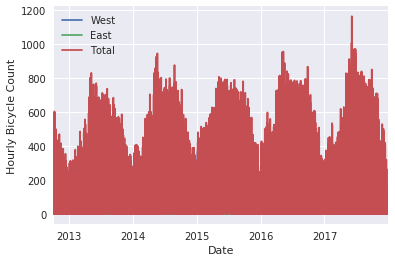

In [55]:
# Visualization
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
data.plot()
plt.ylabel("Hourly Bicycle Count");

# Cont...

# (NOT HERE) High Performance Pandas : eval() and query()

As we've already seen in previous chapters, the power of the PyData stack is built upon the ability of NumPy and Pandas to push basic operations into C via an intuitive syntax : 
<br> examples are vectorized/broadcasted operations in NumPy, and grouping-type operations in Pandas.
<br> While these abstractions are efficient and effective for common use cases, they often rely on the creation of temporary intermediate objects, which can **cause overhead in computational time and memory use.**

<br> As of version 0.13, Pandas includes some experimental tools that allow you to directly access C-speed operations without costly allocation of intermediate arrays.

<br> These are `eval()` and `query()` functions, which rely on the `Numexpr` package.

### 1. Motivating query() and eval() : Compound Expressions

In [56]:
# We've seen that NumPy and Pandas support fast vectorized operations
# For example,

import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1E6)
y = rng.rand(1E6)
%timeit x + y

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
# As discussed earlier, this is much faster
# than doing the addition via a Python loop or comprehension
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

But this abstraction can become less efficient when you are computing compound expressions.

In [ ]:
mask = (x > 0.5) & (y < 0.5)

In [ ]:
# Because NumPy evaluates each subexpression, this is roughly equivalent to the following
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In other words, *every intermediate step* is explicitly allocated in memory.

In [ ]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

The benefit here is that Numexpr evaluates the expression in a way that does not use full-sized temp arrays.
<br>The Pandas eval() and query() tools are conceptually similar, and depend on the Numexpr package.

### 2. pandas.eval() for Efficient Operations
The `eval()` function in Pandas use string expressions to efficiently compute operations.

In [ ]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))
df1, df2, df3, df4

In [ ]:
# To compute the sum of all four DataFrames using the typical pandas approach, we can just write the sum
%timeit df1 + df2 + df3 + df4

In [ ]:
# We can compute the same result via pd.eval as follows
%timeit pd.eval('df1 + df2 + df3 + df4')

The `eval()` version is about 50% faster, and uses much less memory.

In [ ]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

##### - Operations supported by pd.eval()
As of Pandas v0.16, `pd.eval()` supports a wide range of operations.
<br>To demonstrate these, we'll use the following integer DataFrames.

In [ ]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))

In [ ]:
# 1. Arithmetic Operators
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

In [ ]:
# 2. Comparison Operators
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

In [ ]:
# 3. Bitwise Operators
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

In [ ]:
# 4. Object attributes and indices
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

### 3. DataFrame.eval() for Column-Wise Operations
Just as Pandas has a top-level `pd.eval()` function, `DataFrames` have an `eval()` method that works in similar ways.

In [ ]:
df = pd.DataFrame(rng.rand(1000,3), columns=['A', 'B', 'C'])
df.head()

In [ ]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

##### - Assignment in DataFrame.eval()
`DataFrame.eval()` also allows assignment to any column.

In [ ]:
# We can use df.eval() to create a new column 'D' and assign to it a value computed from the other columns
df.eval('D = (A + B) / C', inplace= True)
df.head()

### 4. DataFrame.query() Method
The `DataFrame` has another method based on evaluated strings, called the `query()` method.

In [ ]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

As with the example used in our discussion of DataFrame.eval(), this is an expression
involving columns of the DataFrame. It cannot be expressed using the Data
Frame.eval() syntax, however! Instead, for this type of filtering operation, you can
use the query() method:

In [ ]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)